In [19]:
import pandas as pd


In [20]:
df = pd.read_csv("eplusout.csv")


In [21]:
df.columns.tolist()

['Date/Time',
 'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
 'WESTDATACENTER_EQUIP:ITE CPU Electricity Rate [W](Hourly)',
 'WESTDATACENTER_EQUIP:ITE Fan Electricity Rate [W](Hourly)',
 'WESTDATACENTER_EQUIP:ITE UPS Electricity Rate [W](Hourly)',
 'WESTDATACENTER_EQUIP:ITE CPU Electricity Rate at Design Inlet Conditions [W](Hourly)',
 'WESTDATACENTER_EQUIP:ITE Fan Electricity Rate at Design Inlet Conditions [W](Hourly)',
 'WESTDATACENTER_EQUIP:ITE UPS Heat Gain to Zone Rate [W](Hourly)',
 'WESTDATACENTER_EQUIP:ITE Total Heat Gain to Zone Rate [W](Hourly)',
 'WESTDATACENTER_EQUIP:ITE Standard Density Air Volume Flow Rate [m3/s](Hourly)',
 'WESTDATACENTER_EQUIP:ITE Air Inlet Dry-Bulb Temperature [C](Hourly)',
 'WESTDATACENTER_EQUIP:ITE Air Inlet Dewpoint Temperature [C](Hourly)',
 'WESTDATACENTER_EQUIP:ITE Air Inlet Relative Humidity [%](Hourly)',
 'WESTDATACENTER_EQUIP:ITE Air Outlet Dry-Bulb Temperature [C](Hourly)',
 'WESTDATACENTER_EQUIP:ITE Supply Heat Index [](H

96 rows could not be parsed


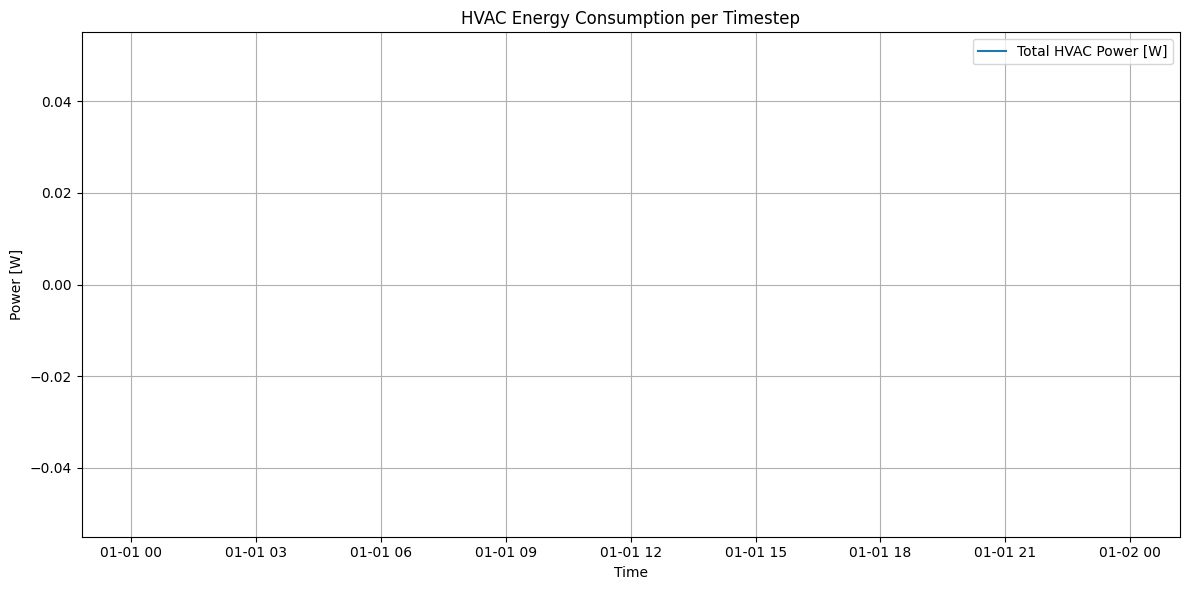

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# ลอง strip whitespace ของ column names
df.columns = df.columns.str.strip()

# สมมติใช้ปี 2025 เป็น reference
df['DateTime'] = pd.to_datetime('2025/' + df['Date/Time'], format='%Y/%m/%d %H:%M:%S', errors='coerce')

# ตรวจสอบว่ามี NaT หรือไม่
print(df['DateTime'].isna().sum(), "rows could not be parsed")

# เลือก columns ของ HVAC load
hvac_cols = [
    'CHILLER:Chiller Evaporator Cooling Rate [W](Hourly)',
    'WEST DX COOLING COIL:Cooling Coil Total Cooling Rate [W](TimeStep)',
    'EAST DX COOLING COIL:Cooling Coil Total Cooling Rate [W](TimeStep)',
    'WEST DATA CENTER IEC:Evaporative Cooler Electricity Rate [W](TimeStep)',
    'EAST DATA CENTER IEC:Evaporative Cooler Electricity Rate [W](TimeStep)',
    'WEST DATA CENTER DEC:Evaporative Cooler Electricity Rate [W](TimeStep)',
    'EAST DATA CENTER DEC:Evaporative Cooler Electricity Rate [W](TimeStep)'
]

# รวมเป็น total HVAC power
df['HVAC_Total_W'] = df[hvac_cols].sum(axis=1)

# วาดกราฟ
plt.figure(figsize=(12,6))
plt.plot(df['DateTime'], df['HVAC_Total_W'], label='Total HVAC Power [W]')
plt.xlabel('Time')
plt.ylabel('Power [W]')
plt.title('HVAC Energy Consumption per Timestep')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
print(df[hvac_cols].dtypes)
print(df[hvac_cols].head())


CHILLER:Chiller Evaporator Cooling Rate [W](Hourly)                       float64
WEST DX COOLING COIL:Cooling Coil Total Cooling Rate [W](TimeStep)        float64
EAST DX COOLING COIL:Cooling Coil Total Cooling Rate [W](TimeStep)        float64
WEST DATA CENTER IEC:Evaporative Cooler Electricity Rate [W](TimeStep)    float64
EAST DATA CENTER IEC:Evaporative Cooler Electricity Rate [W](TimeStep)    float64
WEST DATA CENTER DEC:Evaporative Cooler Electricity Rate [W](TimeStep)    float64
EAST DATA CENTER DEC:Evaporative Cooler Electricity Rate [W](TimeStep)    float64
dtype: object
   CHILLER:Chiller Evaporator Cooling Rate [W](Hourly)  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                0.0     
4                                                NaN     

   WEST DX COOLING COIL:Cooling Coil Total Cooling Rate [W](Tim

In [35]:
# ตรวจสอบว่าคอลัมน์ใดมีค่าเป็น 0 ทั้งหมด
zero_cols = df.columns[(df == 0).all()]
print("Columns ที่มีค่าเป็น 0 ทั้งหมด:")
print(zero_cols)

# ตรวจสอบว่ามีค่า 0 บางส่วนเท่าไหร่ในแต่ละคอลัมน์
zero_counts = (df == 0).sum()
print("\nจำนวนค่า 0 ในแต่ละคอลัมน์:")
print(zero_counts)


Columns ที่มีค่าเป็น 0 ทั้งหมด:
Index(['WEST ZONE CW COOLING COIL:Cooling Coil Total Cooling Rate [W](TimeStep)',
       'WEST ZONE CW COOLING COIL:Cooling Coil Sensible Cooling Rate [W](TimeStep)',
       'WEST DATA CENTER IEC:Evaporative Cooler Total Stage Effectiveness [](TimeStep)',
       'WEST DATA CENTER IEC:Evaporative Cooler Operating Mode Status [](TimeStep)',
       'EAST DATA CENTER IEC:Evaporative Cooler Total Stage Effectiveness [](TimeStep)',
       'EAST DATA CENTER IEC:Evaporative Cooler Operating Mode Status [](TimeStep)',
       'WEST DATA CENTER IEC:Evaporative Cooler Electricity Rate [W](TimeStep)',
       'WEST DATA CENTER IEC:Evaporative Cooler Water Volume [m3](TimeStep)',
       'EAST DATA CENTER IEC:Evaporative Cooler Electricity Rate [W](TimeStep)',
       'EAST DATA CENTER IEC:Evaporative Cooler Water Volume [m3](TimeStep)',
       'WEST DATA CENTER DEC:Evaporative Cooler Electricity Rate [W](TimeStep)',
       'EAST DATA CENTER DEC:Evaporative Cooler Electr

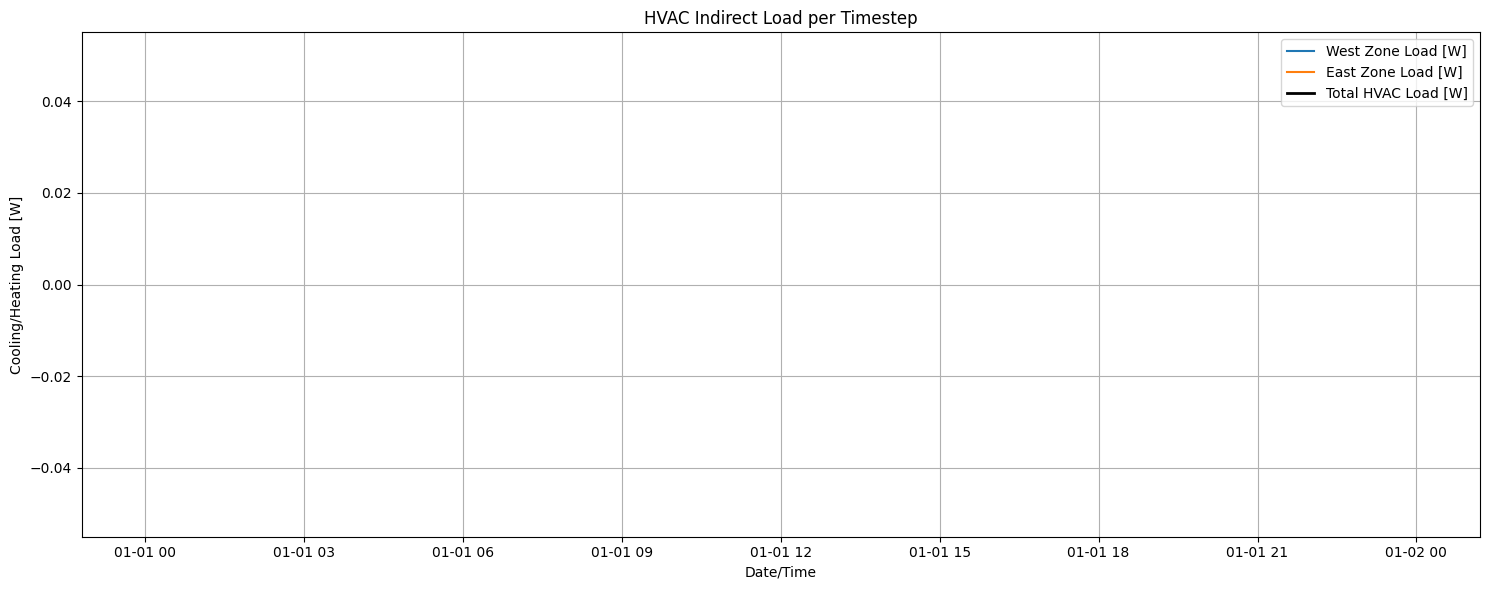

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# ค่า cp ของอากาศ (J/kg·C)
cp_air = 1006  

# สมมติ timestep = 15 นาที → 0.25 ชั่วโมง
timestep_hr = 0.25  

# คำนวณ Cooling/Heating load สำหรับ West Zone
df['West_Cooling_Load_W'] = df['WEST ZONE INLET NODE:System Node Mass Flow Rate [kg/s](TimeStep)'] * \
                            cp_air * \
                            (df['WEST ZONE INLET NODE:System Node Temperature [C](TimeStep)'] - df['WEST ZONE:Zone Air Temperature [C](TimeStep)'])

# คำนวณ Cooling/Heating load สำหรับ East Zone
df['East_Cooling_Load_W'] = df['EAST ZONE INLET NODE:System Node Mass Flow Rate [kg/s](TimeStep)'] * \
                            cp_air * \
                            (df['EAST ZONE INLET NODE:System Node Temperature [C](TimeStep)'] - df['EAST ZONE:Zone Air Temperature [C](TimeStep)'])

# รวม HVAC load ทั้งระบบ
df['HVAC_Load_W'] = df['West_Cooling_Load_W'] + df['East_Cooling_Load_W']

# แปลงเป็น kWh ต่อ timestep
df['HVAC_Load_kWh'] = df['HVAC_Load_W'] * timestep_hr / 1000

# แปลง datetime ถ้ายังไม่มี
if 'DateTime' not in df.columns:
    df['DateTime'] = pd.to_datetime(df['Date/Time'], errors='coerce')

# Plot กราฟ
plt.figure(figsize=(15,6))
plt.plot(df['DateTime'], df['West_Cooling_Load_W'], label='West Zone Load [W]')
plt.plot(df['DateTime'], df['East_Cooling_Load_W'], label='East Zone Load [W]')
plt.plot(df['DateTime'], df['HVAC_Load_W'], label='Total HVAC Load [W]', linewidth=2, color='black')
plt.xlabel('Date/Time')
plt.ylabel('Cooling/Heating Load [W]')
plt.title('HVAC Indirect Load per Timestep')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
